In [32]:
# 타이타닉 데이터를 회귀분석해서 종속변수를 예측하는데 종속변수를 나이에 두고 회귀분석 하자
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing  # 독립변수 정규화 라이브러리
from sklearn.linear_model import LinearRegression

# 1. 데이터 로드 -> 데이터 프레임
df = sns.load_dataset('titanic')
df

pd.set_option('display.max_columns',15)

# 2. 결손값 확인, 제거 or 치환(다른 값으로 변경)
# 2-1. 데이터 프레임의 자료형을 확인
mask = (df.age < 10) | (df.sex == 'female')
mask
df['child_woman'] = mask.astype(int)

# 2-2. 결측(NaN) 컬럼을 확인하기
# 2-3. deck, embark_town을 삭제하자
rdf = df.drop(['deck', 'embark_town'], axis=1)
rdf
# 2-4. age에 나이가 없는 행을 삭제하자 (종속변수가 age 이기때문에) : dropna(대상 subset['컬럼명'], 조건 how)
# 데이터가 한개라도 없으면 drop -> how='any'
# 데이터가 모두 없으면 drop -> how='all'
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
rdf

# 2-5. embarked열의 NaN 값을 승선 도시 중 가장 많이 출현한 값으로 치환 -> idxmax(), fillna(채울값, inplace)
most_freg = rdf['embarked'].value_counts().idxmax()
most_freg  # 'S'
rdf['embarked'].fillna(most_freg,inplace=True)
rdf

# 3. 범주형 데이터를 숫자형으로 변환
# 3-1. 분석에 필요한 속성 선택
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked','child_woman']]
ndf

# 3-2. one-hot 작업 -> 범주형 데이터 숫자형 변환 pd.get_dummies() , sex, embarked
# 범주형 데이터 숫자 변환 -> onehot 병합 -> 원래 컬럼 삭제
gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender],axis=1)
ndf
em = pd.get_dummies(ndf['embarked'])
ndf = pd.concat([ndf,em],axis=1)
ndf

ndf.drop(['sex','embarked'],axis=1,inplace=True)
ndf

# 4. 정규화 : 라벨, 종속변수 / 데이터, 독립변수
# 4-1. 독립변수(데이터)와 종속변수(label,정답) 지정 -> 독립변수 정규화
# 독립변수 지정
X = ndf[['survived','pclass','sibsp','parch','child_woman','female','male','C','Q','S']]
# 종속변수 지정
y = ndf['age']  

# 독립변수 정규화 (배열로 변경)
X = preprocessing.StandardScaler().fit(X).transform(X)
X

# 5. 다중회귀분석 모형
# 5-1. 모형(모델) 선택
lr= LinearRegression() 
# 5-2. 학습
lr.fit(X,y)

y_hat = lr.predict(X)
y_hat

# 6. 시각화


array([27.02128892, 31.82374931, 22.17607959, 34.28055127, 29.4764912 ,
       44.03616515,  0.54530219, 22.06007837, 24.54391233, 19.66287671,
       36.73575355, 29.4764912 , 26.73128587, 25.88411281, 29.45591657,
        2.67865748, 23.42891054, 36.75632817, 33.04829496, 26.76463716,
       40.32813193, 18.46050538, 19.43087426, 36.5545571 , 41.57936318,
       36.75632817, 39.12416091, 41.58096288, 29.4764912 , 20.97370826,
       17.26407535, 23.42891054, 30.70874751, 24.42791111, 26.76463716,
       23.42891054, -1.90990009, 29.4764912 , 31.82374931, 27.0007143 ,
       41.52136257, 29.45591657, 27.01968923, 26.88471307, 17.0844786 ,
       27.01968923, 36.73575355, 41.58096288,  0.48730158, 29.45591657,
       29.4764912 , 12.23926927, 24.56608665, 36.75632817, 13.49210022,
       36.75632817, 24.56448695, 25.76845798, 29.4764912 , 11.42471216,
       22.17607959, 29.4764912 , 25.76845798, 44.03616515, 29.45591657,
       14.81047277, 26.84728709, 29.2541455 , 29.4764912 , 29.47

In [58]:
# 타이타닉 데이터를 회귀분석해서 종속변수를 예측하는데 종속변수를 나이에 두고
# 결측값을 중간값으로 지정 생존율을 종속변수로 지정
# K-NN 모델의 정확도를 확인
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing  # 독립변수 정규화 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

# 1. 데이터 로드 -> 데이터 프레임
df = sns.load_dataset('titanic')
df

pd.set_option('display.max_columns',15)

# 2. 결손값 확인, 제거 or 치환(다른 값으로 변경)
# 2-1. 데이터 프레임의 자료형을 확인


# 2-2. 결측(Nan) 컬럼을 확인하기
# 2-3. deck, embark_town을 삭제하자
rdf = df.drop(['deck', 'embark_town'], axis=1)
rdf

# 2-4. age의 결손값을 중간값으로 대처 (종속변수가 age 이기때문에) 
# fillna() , median() : 중간값
rdf['age'].fillna(rdf['age'].median(), inplace=True)
rdf

# 2-5. embarked열의 NaN 값을 승선 도시 중 가장 많이 출현한 값으로 치환 -> idxmax(), fillna(채울값, inplace)
most_freg = rdf['embarked'].value_counts().idxmax()
most_freg  # 'S'
rdf['embarked'].fillna(most_freg,inplace=True)
rdf

# 3. 범주형 데이터를 숫자형으로 변환
# 3-1. 분석에 필요한 속성 선택
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
ndf

# 3-2. one-hot 작업 -> 범주형 데이터 숫자형 변환 pd.get_dummies() , sex, embarked
# 범주형 데이터 숫자 변환 -> onehot 병합 -> 원래 컬럼 삭제
gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender],axis=1)
ndf
em = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf,em],axis=1)
ndf

ndf.drop(['sex','embarked'],axis=1,inplace=True)
ndf

# 4. 정규화 : 라벨, 종속변수 / 데이터, 독립변수
# 4-1. 독립변수(데이터)와 종속변수(label,정답) 지정 -> 독립변수 정규화
# 독립변수 지정
X = ndf[['pclass','sibsp','parch','female','male','town_C','town_Q','town_S']]
# 종속변수 지정
y = ndf['survived'] 

# 독립변수 정규화 (배열로 변경)
X = preprocessing.StandardScaler().fit(X).transform(X)
X

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 개수 확인
print(X_train.shape)
print(X_test.shape)

# 5. 모델링
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 사망자와 생존자를 예측
y_hat = knn.predict(X_test)
y_hat

# 6. 모델 평가
knn_met = confusion_matrix(y_test, y_hat) # 이원화 작업, 교차표, 이원교차표
print(knn_met)

# 정확도 확인 : 정답률
accuracy = accuracy_score(y_test,y_hat)
print(accuracy)

(623, 8)
(268, 8)
[[151  17]
 [ 40  60]]
0.7873134328358209


In [64]:
import numpy as np

# 1) 평균이 30이고 표준편차가 5인 가우시안 정규분포를 따르는 모집을 백만개를 구성하자
avg=30
std = 5
N = 1000000
res = np.random.randn(N) * std + avg
print(res)

# 2) 서울시 초등학생 백만명의 키를 모집단으로 구성하는데 평균 키가 150.2 이고
# 표준편차가 30인 모집단을 구성하시오
avg = 150.2
std = 30
N = 1000000
res = np.random.randn(N) * std + avg
print('모집단 생성 : ',res)

# 3) 2번의 모집단에서 100명을 표본으로 추출 후
# 100명의 평균키를 리스트 객체(my_list)에 입력하는 작업을 10000번 수행하자
# --> my_list 에 있는 10000개의 표본의 평균키가 입력되게 하자
my_list = []

for i in range(1,10001):
    result = np.random.choice(res,100).mean()  # 평균값
    my_list.append(result) # 평균값을 10000번 입력

# print(my_list)
print(len(my_list))

# 초등학교 100만명의 키 모집단에서 표본을 100개를 추출해서 표본 평균을 10000개 모았다.


[31.17672255 24.18787584 31.31254588 ... 24.26380528 31.92879281
 29.45230009]
모집단 생성 :  [110.53049035 155.53868896 129.43786871 ... 142.46784941 115.11866105
 160.71762189]
10000


[0.00039947 0.00039993 0.00040039 ... 0.00059083 0.00059017 0.00058952]


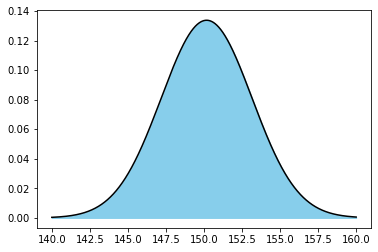

In [73]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

avg = 150.2
std = 30
N = 1000000
res = np.random.randn(N) * std + avg
# print('모집단 생성 : ',res)

my_list=[]
for i in range(1,10001):
    result = np.random.choice(res,100).mean()  # 평균값
    my_list.append(result) # 평균값을 10000번 입력

x = np.arange(140, 160, 0.001) # 140~106까지 0.001의 간격으로 숫자 생성
# norm.pdf(데이터, 평균, 표준편차)
y = norm.pdf(x, np.mean(my_list), np.std(my_list))

print(y)  # 초등학생 키의 표본 평균값들에 대한 확률 밀도 함수 값을 출력
plt.plot(x,y,color='black')

# 그래프의 아래 영역을 색깔로 채우기
plt.fill_between(x,y, interpolate = True, color='skyblue' )

In [92]:
# 동전을 10번 던져서 앞면이 2번 나올 확률을 출력하자 (동전을 10번, 작업을 10000번 수행)
import random

coin = ['앞면','뒷면']
cnt = 0

for k in range(10000):
    a= []
    for i in range(1,11):
        result = random.choice(coin)
        a.append(result)
    
    if a.count('앞면') == 2:
        cnt = cnt + 1

# print(a, len(a))
# print(a.count('앞면'))
print(cnt/10000)  # 확률

0.0459


In [93]:
# 주사위 2개를 동시에 던져서 두 주사위의 합이 10 이 나오는 확률을 출력 (주사위 2개를 동시에 작업을 10000번 수행)
dice1 = list(range(1,7))
dice2 = list(range(1,7))
cnt = 0

for k in range(10000):
    result1 = random.choice(dice1)
    result2 = random.choice(dice2)
    
    if result1+result2 == 10:
        cnt = cnt+1

print(cnt/10000)

0.0826
4


In [100]:
# 주머니에서 임의의 공을 뽑았을때 그 공이 파란색일 확률
# (공을 뽑는 작업 10000번 수행)
box = ['red','blue','green','blue','red','black']

cnt = 0
for k in range(10000):
    res = random.choice(box)
    
    if res == 'blue':
        cnt += 1

print(cnt/10000)

0.3335


In [125]:
from random import shuffle
# 파란공 70개와 빨간공 30개가 있는 주머니를 만들자
a = ['blue']*70
b = ['red']*30
box = a+b
# box, len(box)  # 요소확인

# 무작위로 섞기
shuffle(box)
# print(box)

# box에서 공 3개를 추출했을때 공 3개가 전부 파란색일 확률은?
# (단, 10000번 수행할 경우)

# 1번 방법 random.choice()
# cnt = 0
# for k in range(10000):
#     res = random.choice(box)
#     res2 = random.choice(box)
#     res3 = random.choice(box)
    
#     if res == 'blue' and res2 == 'blue' and res3 == 'blue':
#         cnt += 1

# 2번 방법 random.sample()
cnt = 0
for k in range(10000):
    res = random.sample(box,3)
    
    if res.count('blue')==3 :
        cnt += 1
        
print(cnt/10000)

0.3463


1. 복원추출법(sampling with replacement : SWR)
 - 추출된 것을 되돌려 넣고 추출하는 방법
 - 복원 추출법은 같은 표본이 중복해서 나올수 있다.
 
 
2. 비복원추출법(sampling without replacement : SWOR)
 - 추출된 것을 되돌려 넣지 않고 추출하는 방법
 - 비복원추출법으로 한 번 추출된 것은 다시 추출되지 않는다

In [126]:
# 비복원 추출
from random import shuffle
# 파란공 70개와 빨간공 30개가 있는 주머니를 만들자
a = ['blue']*70
b = ['red']*30
box = a+b
# box, len(box)  # 요소확인

# 무작위로 섞기
shuffle(box)
# print(box)


# random.sample() -> 비복원 추출
cnt = 0
for k in range(10000):
    res = random.sample(box,3)
    
    if res.count('blue')==2 :
        cnt += 1
        
print(cnt/10000)

0.4583


In [190]:
# 복원 추출
from random import shuffle
# 파란공 70개와 빨간공 30개가 있는 주머니를 만들자
a = ['blue']*70
b = ['red']*30
box = a+b
# box, len(box)  # 요소확인

# 무작위로 섞기
shuffle(box)
# print(box)


# random.choice() -> 복원 추출
cnt = 0
for k in range(10000):
    res = []
    for i in range(3):
        res.append(random.choice(box))
    
    if res.count('red')==1 :
        cnt += 1
        
print(cnt/10000)
print(res)

0.4382
['red', 'blue', 'blue']


In [153]:
# 복원 추출 2번째 방법
from random import shuffle
# 파란공 70개와 빨간공 30개가 있는 주머니를 만들자
a = ['blue']*70
b = ['red']*30
box = a+b
# box, len(box)  # 요소확인

# 무작위로 섞기
shuffle(box)
# print(box)


# random.choice() -> 복원 추출
cnt = 0
cnts = 0
for k in range(10000):
    res = list(np.random.choice(box,3,replace=True)) # replace=True 면 복원
    cnts +=1
    if res.count('blue')==2 :
        cnt += 1
        
print(cnt/cnts)

0.4339


In [194]:
# 6개의 제품이 들어있는 상자가 있다. 그 중 2개가 불량품일 경우
# 제품 검사를 위해 3개를 추출 -> 1개가 불량품일 확률은? (복원추출)
box = ['정상','불량','정상','정상','정상','불량']

cnt = 0
cnts = 0
for k in range(10000):
    res = list(np.random.choice(box,3, replace=True))
    cnts += 1 
    if res.count('불량')==1:
        cnt += 1

print(cnt/cnts)

0.4454


로지스틱 회귀는 대수 확률을 설명 변수 $x_i$ 선형 합으로 표현한다

예측하고자하는 (양 사건)의 확률을 $p$할 때 확률은  $p / ( 1 - p )$ 라고 쓰고 사건의 발생을 나타낸다

확률의 로그를 취한 것이 대수 확률이다. 

$$
    \log(\frac{p}{1-p}) = w_0x_0 + w_1x_1 + \cdots +w_mx_m = \sum^m_{i=0}w_ix_i
$$

여기서 가중치$w_0$은 , $x_0=1$로 절편을 나타낸다.

로지스틱 회귀는 대수 확률과 여러 설명 변수의 관계를 나타내는 $w_i$  를 학습하는 것이 목적이다.

설명변수의 값이 있을 경우 긍정적 사고의 확률 p이며, 위의 식을 좌변을 p로 한다면 아래와 같다

$$
    \frac{1}{1+\exp(-\sum^m_{i=0}w_ix_i)}
$$

분류를 위한 알고리즘 (ex. 전자제품 고장날 확률)

단, 설명변수와 데이터가 있는 공간의 선형분리가 가능한 경우만 성능이 높다


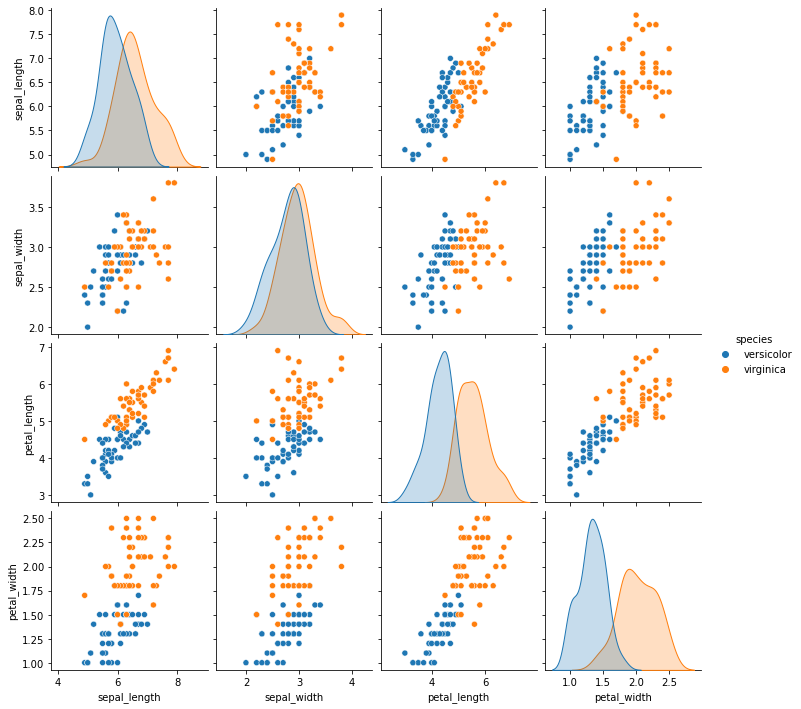

In [199]:
# 꽃잎의 길이(petal_length)에 의해 품종을 분류해보자
# 품종(species)당 꽃받침 조각(sepal_length)과 꽃잎의 길이(petal_length) 및
# 너비 값과 품종의 관계를 알 수 있다.
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing  # 독립변수 정규화 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

iris_df = sns.load_dataset('iris')
iris_df = iris_df[(iris_df['species']=='versicolor') |
                 (iris_df['species']=='virginica')]  # 두 품종으로 구성
iris_df.head()

sns.pairplot(iris_df, hue='species')

In [209]:
# 꽃잎의 길이를 사용해서 품종을 분류_ 로지스틱 회귀 모델을 사용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris_df[['petal_length']]  # 설명 변수 = 꽃잎의 길이
# versicolor 클래스 0, virginica 클래스 1로
y = iris_df['species'].map({'versicolor':0, 'virginica':1})


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

lr = LogisticRegression()  # 로지스틱 회귀 모델의 인스턴스 생성
lr.fit(X_train, y_train)  # 학습

print("coefficient = ", lr.coef_) # 계수
print("intercept = ", lr.intercept_) # 절편
'''
LogisticRegression(penalty,C)

 penalty = L1 정규화는 설명변수의 가중치가 0
           L2 정규화는 설명변수의 가중치가 커지는 것을 방지하도록 과도한 학습은 방지하자라는 뜻
 C : 정규화 강도를 지정하는 파라미터 (1,0)
'''


coefficient =  [[3.34868974]]
intercept =  [-16.18423776]


'\nLogisticRegression(penalty,C)\n\n penalty = L1 정규화는 설명변수의 가중치가 0\n           L2 정규화는 설명변수의 가중치가 커지는 것을 방지하도록 과도한 학습은 방지하자라는 뜻\n C : 정규화 강도를 지정하는 파라미터 (1,0)\n'

In [211]:
from sklearn.metrics import *

y_pred = lr.predict(X_test)
print(y_pred)

# confusion matrix : 실제 클래스가 0,1의 데이터에 대한 클래스 0,1로 분류된 데이터의 개수를 요소로 리턴하는 행렬
print('confusion : ', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy : ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision : ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall : ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1_score : ', f1_score(y_true=y_test, y_pred=y_pred))


[0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0]
confusion :  [[10  3]
 [ 0 12]]
accuracy :  0.88
precision :  0.8
recall :  1.0
f1_score :  0.888888888888889


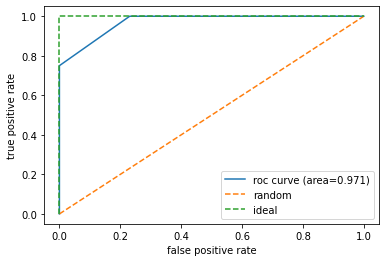

In [215]:
from sklearn.metrics import roc_curve, auc

y_score = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

# 가로(FPR), 세로(TPR)
plt.plot(fpr, tpr, label='roc curve (area=%0.3f)' %auc(fpr, tpr))
plt.plot([0,1], [0,1], linestyle='--', label='random')
plt.plot([0,0,1], [0,1,1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [218]:
from sklearn.metrics import roc_auc_score

print("auc : ", roc_auc_score(y_true=y_test, y_score=y_score))
#auc 클래스 1의 데이터에 대한 점수가 가장 큰 예측률이 되고, 실제로 0의 데이터에 대한 점수는 낮게 예측된다

# 로지스틱
1. 데이터가 어떤 데이터에 속하는지 예측, 분류 ( 고객이 상품을 사거나 사지않을 경우의 유무 )
2. 주목하고 있는 사건이 발생할 확률 예측 ( 고객이 몇 %의 확률로 상품을 구매할지 )


auc :  0.9711538461538463


confusion :  [[116  23]
 [ 23  61]]
accuracy :  0.7937219730941704
precision :  0.7261904761904762
recall :  0.7261904761904762
f1_score :  0.7261904761904762
auc :  0.8645940390544707


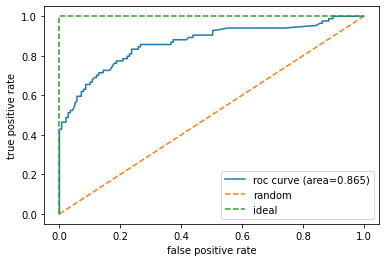

In [259]:
# 타이타닉 데이터를 가지고 로지스틱을 이용해서 분류해보자
'''
2개의 train 데이터로 X,y
test라는 데이터로 테스트
로지스틱으로 분석한 후 roc_auc_score 점수 확인, 시각화
'''

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing  # 독립변수 정규화 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

# 1. 데이터 로드 -> 데이터 프레임
df = pd.read_csv('titanic_train.csv')
df

# 2. 결손값 확인, 제거 or 치환(다른 값으로 변경)
# 2-1. 결측(Nan) 컬럼을 확인하기

# # 2-2. deck, embark_town을 삭제하자
rdf = df.drop(['Name', 'Ticket','Fare','Cabin'], axis=1)
rdf

# 2-3. age의 결손값을 중간값으로 대처 (종속변수가 age 이기때문에) 
# fillna() , median() : 중간값
rdf['Age'].fillna(rdf['Age'].median(), inplace=True)
rdf

# 3. 범주형 데이터를 숫자형으로 변환
# 3-1. 분석에 필요한 속성 선택
ndf = rdf[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
ndf

# 3-2. one-hot 작업 -> 범주형 데이터 숫자형 변환 pd.get_dummies() , sex, embarked
# 범주형 데이터 숫자 변환 -> onehot 병합 -> 원래 컬럼 삭제
gender = pd.get_dummies(ndf['Sex'])
ndf = pd.concat([ndf,gender],axis=1)
ndf
em = pd.get_dummies(ndf['Embarked'], prefix='town')
ndf = pd.concat([ndf,em],axis=1)
ndf

ndf.drop(['Sex','Embarked'],axis=1,inplace=True)
ndf

# 4. 정규화 : 라벨, 종속변수 / 데이터, 독립변수
# 4-1. 독립변수(데이터)와 종속변수(label,정답) 지정 -> 독립변수 정규화
# 독립변수 지정
X = ndf[['Pclass','Age','SibSp','Parch','female','male','town_C','town_Q','town_S']]
# 종속변수 지정
y = ndf['Survived'] 

# 독립변수 정규화 (배열로 변경)
X = preprocessing.StandardScaler().fit(X).transform(X)
X

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# 개수 확인
# print(X_train.shape)
# print(X_test.shape)
# print(y_test)

# 5. 모델링
lr = LogisticRegression()  # 로지스틱 회귀 모델의 인스턴스 생성
lr.fit(X_train, y_train)  # 학습

# 테스트 데이터에 대한 사망자와 생존자를 예측
y_pred = lr.predict(X_test)
# print(y_pred)

y_score = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

print('confusion : ', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy : ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision : ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall : ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1_score : ', f1_score(y_true=y_test, y_pred=y_pred))
print("auc : ", roc_auc_score(y_true=y_test, y_score=y_score))

# 가로(FPR), 세로(TPR)
plt.plot(fpr, tpr, label='roc curve (area=%0.3f)' %auc(fpr, tpr))
plt.plot([0,1], [0,1], linestyle='--', label='random')
plt.plot([0,0,1], [0,1,1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()


In [262]:
# 타이타닉 데이터를 가지고 로지스틱을 이용해서 분류해보자
'''
2개의 train 데이터로 X,y
test라는 데이터로 테스트
로지스틱으로 분석한 후 roc_auc_score 점수 확인, 시각화
'''

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing  # 독립변수 정규화 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# 1. 데이터 로드 -> 데이터 프레임
df2 = pd.read_csv('titanic_test.csv')
# print(df2)

# 2. 결손값 확인, 제거 or 치환(다른 값으로 변경)
# 2-1. 결측(Nan) 컬럼을 확인하기

# # 2-2. 삭제
rdf = df.drop(['Name', 'Ticket','Fare','Cabin'], axis=1)
rdf

# 2-3. age의 결손값을 중간값으로 대처 (종속변수가 age 이기때문에) 
# fillna() , median() : 중간값
rdf['Age'].fillna(rdf['Age'].median(), inplace=True)
rdf

# 3. 범주형 데이터를 숫자형으로 변환
# 3-1. 분석에 필요한 속성 선택
ndf = rdf[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
ndf

# 3-2. one-hot 작업 -> 범주형 데이터 숫자형 변환 pd.get_dummies() , sex, embarked
# 범주형 데이터 숫자 변환 -> onehot 병합 -> 원래 컬럼 삭제
gender = pd.get_dummies(ndf['Sex'])
ndf = pd.concat([ndf,gender],axis=1)
ndf
em = pd.get_dummies(ndf['Embarked'], prefix='town')
ndf = pd.concat([ndf,em],axis=1)
ndf

ndf.drop(['Sex','Embarked'],axis=1,inplace=True)
ndf

# 4. 정규화 : 라벨, 종속변수 / 데이터, 독립변수
# 4-1. 독립변수(데이터)와 종속변수(label,정답) 지정 -> 독립변수 정규화
# 독립변수 지정
X2 = ndf[['Pclass','Age','SibSp','Parch','female','male','town_C','town_Q','town_S']]
print(X2)

# 독립변수 정규화 (배열로 변경)
#normalization : 서로 다른 범위(분포)를 갖는 값을 같은 범위 나이 1~100, 수입 0달러에서 20000달러
#standarization : 오차 범위가 너무 큰 아웃라이어들을 배제해주는 작업입니다.
X2 = preprocessing.StandardScaler().fit(X).transform(X)
print(X2)

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# # 개수 확인
# print(X_train.shape)
# print(X_test.shape)


# # 테스트 데이터에 대한 사망자와 생존자를 예측
# y_pred2 = lr.predict(X2)
# print(y_pred2)

# y_score = lr.predict_proba(X2)
# fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

# print("auc : ", roc_auc_score(y_true=y_test, y_score=y_score))

# # 가로(FPR), 세로(TPR)
# plt.plot(fpr, tpr, label='roc curve (area=%0.3f)' %auc(fpr, tpr))
# plt.plot([0,1], [0,1], linestyle='--', label='random')
# plt.plot([0,0,1], [0,1,1], linestyle='--', label='ideal')
# plt.legend()
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.show()


     Pclass   Age  SibSp  Parch  female  male  town_C  town_Q  town_S
0         3  22.0      1      0       0     1       0       0       1
1         1  38.0      1      0       1     0       1       0       0
2         3  26.0      0      0       1     0       0       0       1
3         1  35.0      1      0       1     0       0       0       1
4         3  35.0      0      0       0     1       0       0       1
..      ...   ...    ...    ...     ...   ...     ...     ...     ...
886       2  27.0      0      0       0     1       0       0       1
887       1  19.0      0      0       1     0       0       0       1
888       3  28.0      1      2       1     0       0       0       1
889       1  26.0      0      0       0     1       1       0       0
890       3  32.0      0      0       0     1       0       1       0

[891 rows x 9 columns]
[[ 0.82737724 -0.56573646  0.43279337 ... -0.48204268 -0.30756234
   0.61930636]
 [-1.56610693  0.66386103  0.43279337 ...  2.0745051  -